
## Scikit learn 
<img src="img/learn.png" width="200">

In [3]:
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
data_train = pd.read_csv('Titanic_codificado_train.csv') 
data_test = pd.read_csv('Titanic_codificado_test.csv')

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']


num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)


In [22]:
data_train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,0,1,0,3,1,4,1,0,0,7,100,19
1,1,2,1,1,0,0,1,0,3,2,182,20
2,2,3,1,3,0,7,0,0,0,7,329,16
3,3,4,1,1,0,7,1,0,3,2,267,20
4,4,5,0,3,1,7,0,0,1,7,15,19


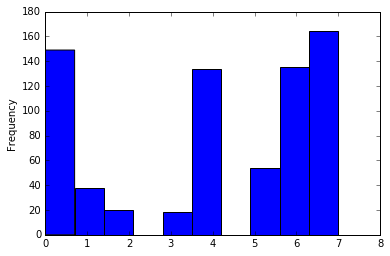

In [6]:
X_train['Age'].plot.hist()

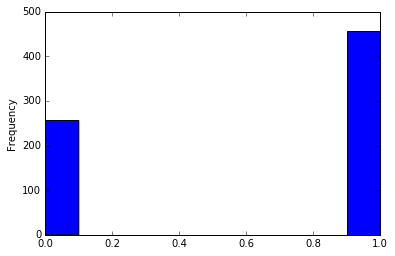

In [8]:
X_train['Sex'].plot.hist()

# Clustering

# Cluster

- Conjunto de valores que tienen algo en común, y se agrupan en función de determinado rasgo.

# Algoritmos de agrupamiento

- Tienen como objetivo devolver al usuario una serie de puntos que en cierto modo representan al resto de puntos iniciales por su posición representativa con respecto al total. 


## Algoritmos de clustering más utilizados  
- k-Means
- Mapas autoorganizados
- Nearest Neighborhood  

# k-Means

- Aprendizaje no supevisado
- Técnica de agrupamiento con diversos parámetros
    - Número de clusters
    - Criterio de paro
    - Valores iniciales (semillas, normalmente se deja con selección aleatoria)
    


# k-Means

1. Toma como parámetro inicial el número de k, que es el número de clusters a generar
2. Selecciona k elementos de forma aleatoria, estos elementos son los centroides de cada cluster
3. A cada objeto (diferente de los centroides) se le asigna el cluster al que se parece más, esto en base a la distancia entre el objeto y el centroide (o media del cluster).
4. Se calcula el nuevo valor del centroide
5. Se itera del paso 3 al 4 hasta que no haya cambios en los valores de los centroides u otro criterio de paro.


## Medidas de similaridad

- Normalmente se utiliza una medida de similaridad basada en el error cuadrático o la distancia Euclidiana

<img src="img/errormedio.png" width="250">

donde $p$ es el objeto, $m_i$ es la media del cluster $C_i$

- Distancia Euclideana

<img src="img/Eclideana.png" width="200">

In [10]:
from IPython.display import YouTubeVideo
#Copiar y pegar el enlace en el navegador para ver el vídeo.
YouTubeVideo('https://www.youtube.com/watch?v=5I3Ei69I40s')

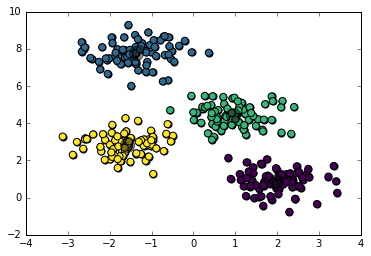

In [23]:
#Aquí creamos datos sintéticos para observar en un plot sus muestras y sus centroides.
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
#Aqui entrenamos un kmeans con los datos del titanic
kmeans_titanic = KMeans(n_clusters=2, random_state=0).fit(X_train)
#predecimos en test
kmeans_predicted = kmeans_titanic.predict(X_test)
#predecimos en train
kmeans_predicted_ = kmeans_titanic.predict(X_train)

In [26]:
import numpy as np
#Aqui solo pasamos un dataframe a otro tipo de dato de array de numpy
X_train_ = np.array(X_train)

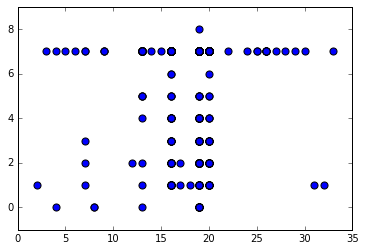

In [28]:
#Se plotea solo las variables 9 y 7
plt.scatter(X_train_[:, 9], X_train_[:, 7], s=50);


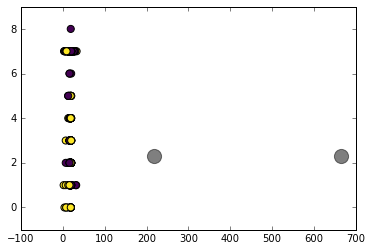

In [29]:
#graficamos los datos del kmeans con los dos centroides calculados, los datos son solo de las variables 
# 9 y 7, pero se entrenó con todas las variables por eso los centroides se ven muy alejados de los puntos.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

plt.scatter(X_train_[:, 9], X_train_[:, 7], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [30]:
X_all.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,0,3,1,4,1,0,0,7,100,19
1,1,1,0,0,1,0,3,2,182,20
2,2,3,0,7,0,0,0,7,329,16
3,3,1,0,7,1,0,3,2,267,20
4,4,3,1,7,0,0,1,7,15,19


In [31]:
X_ = data_train[['Cabin','NamePrefix']]
y_ = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)


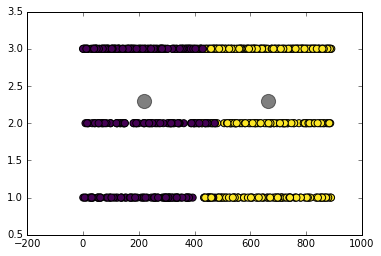

In [33]:
#Se vuelve a entrenar el k-means solo con los valores de las variabes 9 y 7.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Ahora vemos como los centroides se paran realmente las dos clases, la negra y la amarilla.

## Fin Clase